In [1]:
class_names=['boxing','handclapping','handwaving','jogging','running','walking']
class_names

['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking']

In [2]:
import skvideo
skvideo.setFFmpegPath('C:\FFmpeg\bin')

F:\Anaconda\envs\har\lib\site-packages\skvideo\__init__.py:306: UserWarning: ffmpeg/ffprobe not found in path: C:\FFmpein
  warnings.warn("ffmpeg/ffprobe not found in path: " + str(path), UserWarning)


In [2]:
# Import DataSet
import numpy as np

#Loading Video DataSets
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

X_valid = np.load('X_valid.npy')
y_valid = np.load('y_valid.npy')

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

X_train_bgsub = np.load('X_train_bgsub.npy')
y_train_bgsub = np.load('y_train_bgsub.npy')

X_valid_bgsub = np.load('X_valid_bgsub.npy')
y_valid_bgsub = np.load('y_valid_bgsub.npy')

X_test_bgsub = np.load('X_test_bgsub.npy')
y_test_bgsub = np.load('y_test_bgsub.npy')

In [3]:
# load and evaluate the saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('latest.h5')
# summarize model.
model.summary()


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 50, 35, 35, 16)    9856      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 35, 35, 16)    64        
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 17, 35, 35, 64)    92224     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 17, 18, 18, 64)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 17, 18, 18, 128)   368768    
_________________________________________________________________
max_poolin

In [4]:
# Testing the model on the Test data
(loss1_bg, accuracy1_bg) = model.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1_bg * 100))

Accuracy on test data: 97.00%


In [5]:
sec=7
frames_needed=50

In [6]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
import cv2
def read_video_bgsub(path,size):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            frame = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [7]:
def read_video_bgsub_flip(path,size):


        cap = FFmpegReader(filename=path)
        #list_of_frames = []
        list_of_frames2 = []
        fps = int(cap.inputfps)                  # Frame Rate
        #T,M,N,C= cap.getShape()
        #frames=int(T)
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        
#         total_length = frames/fps
#         excess_len = int((total_length-sec)/6)
        
#         excess_frames = excess_len*fps
        
        remove=0
        
            
            
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #temp_image2= temp_image.transpose(Image.FLIP_LEFT_RIGHT)
            #temp_image3= image.img_to_array(temp_image2)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
#             fgmask = image.array_to_image(fgmask)
#             
#             fgmask = image.img_to_array(temp_image2)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            #print("fgmask:",type(fgmask))
            #fgmask = fgmask.transpose(Image.FLIP_LEFT_RIGHT)
            fgmask = np.flip(fgmask,1)
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            #frame = image.img_to_array(
            #            fgmaskimg.resize(
            #                (size, size),
            #                Image.ANTIALIAS)).astype('uint8')
            frame2 = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            
            #remove+=1
            if index%frame_alternate == 0:
                if count < frames_needed:
                    #list_of_frames.append(frame);
                    list_of_frames2.append(frame2);
                    count= count+1;

        temp_video = np.stack(list_of_frames2)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [8]:
def read_video_flip(path):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        list_of_frames2 = []
        fps = int(cap.inputfps)                  # Frame Rate
#         T,M,N,C= cap.getShape()
#         frames=int(T)
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
#         total_length = frames/fps
#         excess_len = int((total_length-sec)/6)
        
#         excess_frames = excess_len*fps
        
        remove=0
                    
            
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            temp_image2= temp_image.transpose(Image.FLIP_LEFT_RIGHT)
#             frame = image.img_to_array(
#                         temp_image.resize(
#                             (20, 20),
#                             Image.ANTIALIAS)).astype('uint8')
            frame2 = image.img_to_array(
                        temp_image2.resize(
                            (35, 35),
                            Image.ANTIALIAS)).astype('uint8')
#             remove+=1
            if index%frame_alternate == 0:
                if count < frames_needed:
                    #list_of_frames.append(frame);
                    list_of_frames2.append(frame2);
                    count= count+1;

        temp_video = np.stack(list_of_frames2)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [9]:
def read_video(path):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            frame = image.img_to_array(
                        temp_image.resize(
                            (35, 35),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [10]:
def read_videos(paths):
 
        list_of_videos = []
        list_of_videos_flip = []
        list_of_videos = [
            read_video(path) for path in tqdm(paths)
        ]
        list_of_videos_flip = [
            read_video_flip(path) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        list_of_videos+=list_of_videos_flip
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))


In [11]:
def read_videos_bgsub(paths, size):
     
        #print("shape1:", list_of_videos[:].shape)
        list_of_videos = []
        list_of_videos_flip = []
        list_of_videos = [
            read_video_bgsub(path, size) for path in tqdm(paths)
        ]
        list_of_videos_flip = [
            read_video_bgsub_flip(path, size) for path in tqdm(paths)
        ]
        
        list_of_videos+=list_of_videos_flip
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))

In [22]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline

#Set file location
test_file = "Test/test3.avi"
test_file=([test_file])
X_test_bgsub = read_videos_bgsub(test_file,35)
X_test_bgsub = X_test_bgsub[:100]
#print('Shape of testing data:', X_test_bgsub.shape)
prediction = model.predict(X_test_bgsub)
predicted_label = np.argmax(prediction[1])
# The path of a sample video in the training data
sample_files = test_file[:1]

# An object of the class 'Videos'
sample = skvideo.io.vread(sample_files[0]);

#print('\nShape of the sample data:', sample.shape)




  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


In [26]:
sample

array([[[[165, 165, 165],
         [167, 167, 167],
         [173, 173, 173],
         ...,
         [174, 174, 174],
         [173, 173, 173],
         [171, 171, 171]],

        [[139, 139, 139],
         [140, 140, 140],
         [145, 145, 145],
         ...,
         [146, 146, 146],
         [146, 146, 146],
         [143, 143, 143]],

        [[140, 140, 140],
         [142, 142, 142],
         [145, 145, 145],
         ...,
         [147, 147, 147],
         [145, 145, 145],
         [143, 143, 143]],

        ...,

        [[ 75,  75,  75],
         [ 80,  80,  80],
         [ 79,  79,  79],
         ...,
         [ 82,  82,  82],
         [ 79,  79,  79],
         [ 80,  80,  80]],

        [[ 76,  76,  76],
         [ 76,  76,  76],
         [ 78,  78,  78],
         ...,
         [ 79,  79,  79],
         [ 81,  81,  81],
         [ 75,  75,  75]],

        [[ 76,  76,  76],
         [ 76,  76,  76],
         [ 76,  76,  76],
         ...,
         [ 81,  81,  81],
        

In [23]:
predicted_label

2

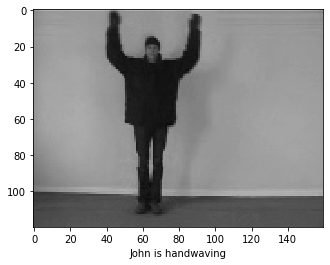

In [24]:
# Displaying a frame from the sample video

msg="John is "+class_names[predicted_label]
plt.xlabel(msg)
plt.imshow(sample[200])